# Data Versions

```markdown
data/
|___ raw/
|       |___ Bx-July/: Data Origin (doesn't split train validation set)
|       |___ dataver0/: Data spited train and validation set
|
|___ processed/         (dataver1, 2, 3 is all impacted by the result of cell cluster detect model)
|       |___ dataver1/: Draw the bounding box of cell cluster in the origin image 
|       |               (split train:valid as dataver0)
|       |___ dataver2_image/: The top 8 cropped cell cluster image from the origin image 
|       |               (split train:valid as dataver0)
|       |               (first - find 8 largest area) 
|       |               (second - if not enough (0-7) then random 2 patch 768x768 + 6 patch 512x512)
|       |___ dataver2_patch/: 12 patch image 256x256 from each 1024x768 image in dataver1
|       |               (split train:valid as dataver0)
|       |               (first - 1024x768 can split by 12 grid, each of them have size 256x256)
|       |               (second - crop then resize to 224x224 - if needed)
|       |___ dataver2_vector/: The output from the extractor feature
|       |               (to merge multi module - model pipeline)
|       |               (CNN, Transformer, CNN + ANN, ...)
|___ external/
|       |___ current doesn't add any data
```

# Look in them

Fix git merge for fast in host machine
```markdown
$ git reset     --hard HEAD     (going back to HEAD) 
$ git reset     --hard HEAD^     (going back to the commit before HEAD) 
$ git reset     --hard HEAD~1     (equivalent to "^") 
$ git reset     --hard HEAD~2     (going back two commits before HEAD)
```

```bash
jupyter notebook --no-browser --port=port_connect # in host machine
ssh -p gate_connect -L port_connect:localhost:port_connect use_name@host_ip # in local machine
```

In [1]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2

def show_apart_of_dataset(folder_path: str):
    # Hàm phụ để lấy tất cả các file ảnh từ thư mục và thư mục con
    def get_all_image_files(path):
        image_files = []
        for root, _, files in os.walk(path):
            for file in files:
                if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                    image_files.append(os.path.join(root, file))
        return image_files
    
    # Lấy danh sách tất cả các file ảnh trong thư mục và thư mục con
    all_files = get_all_image_files(folder_path)
    
    # Kiểm tra nếu có đủ ảnh
    if len(all_files) < 8:
        raise ValueError("Thư mục không chứa đủ ảnh để chọn ngẫu nhiên 8 ảnh.")
    
    # Chọn ngẫu nhiên 8 ảnh
    selected_files = random.sample(all_files, 8)
    
    # Tạo subplot để hiển thị ảnh
    fig, axes = plt.subplots(2, 4, figsize=(15, 6))
    axes = axes.flatten()
    
    # Đọc và hiển thị từng ảnh
    for ax, img_path in zip(axes, selected_files):
        image = Image.open(img_path).convert('RGB')
        if "dataver1" in img_path or "dataver2_patch" in img_path:
            image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
            image = Image.fromarray(image)
        ax.imshow(image)
        ax.set_title(os.path.basename(img_path))
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

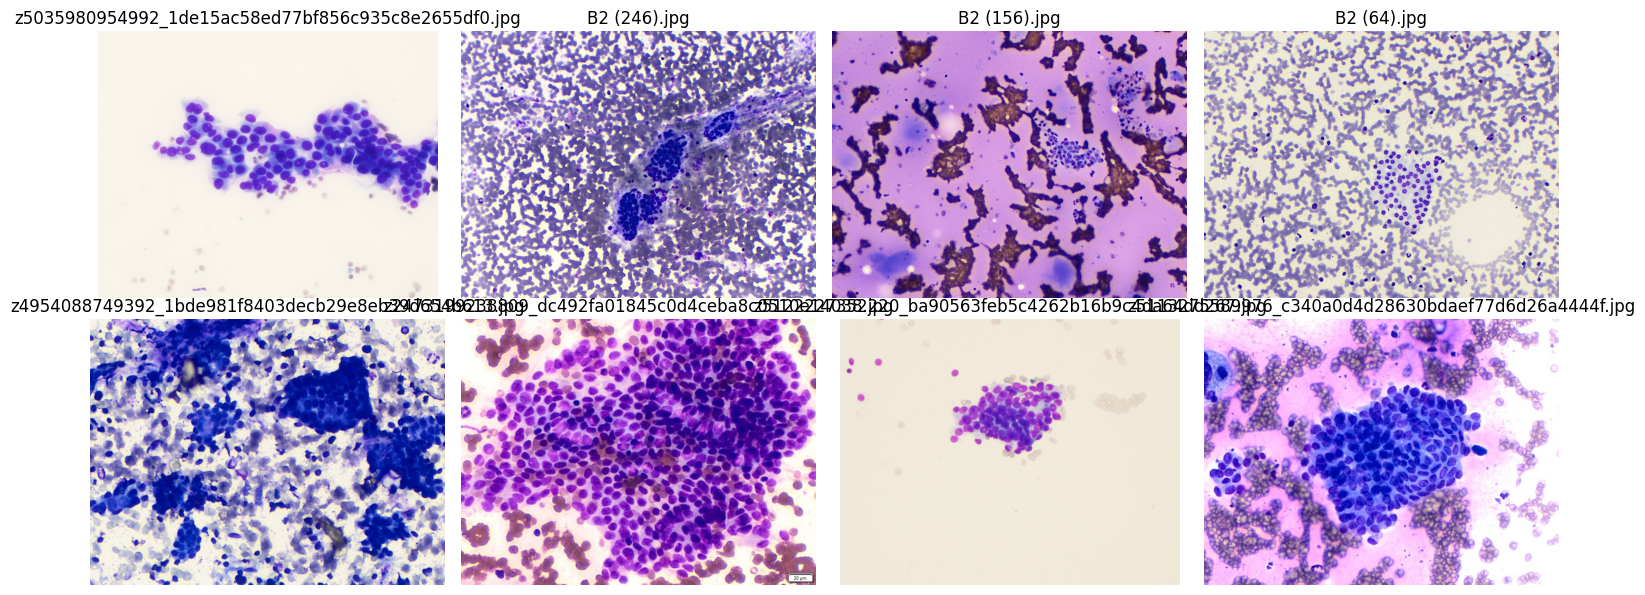

In [2]:
folder_path = '/home/haipn/data/dataver0'
show_apart_of_dataset(folder_path) 
# Bộ dữ liệu đang lưu ở dạng RGB

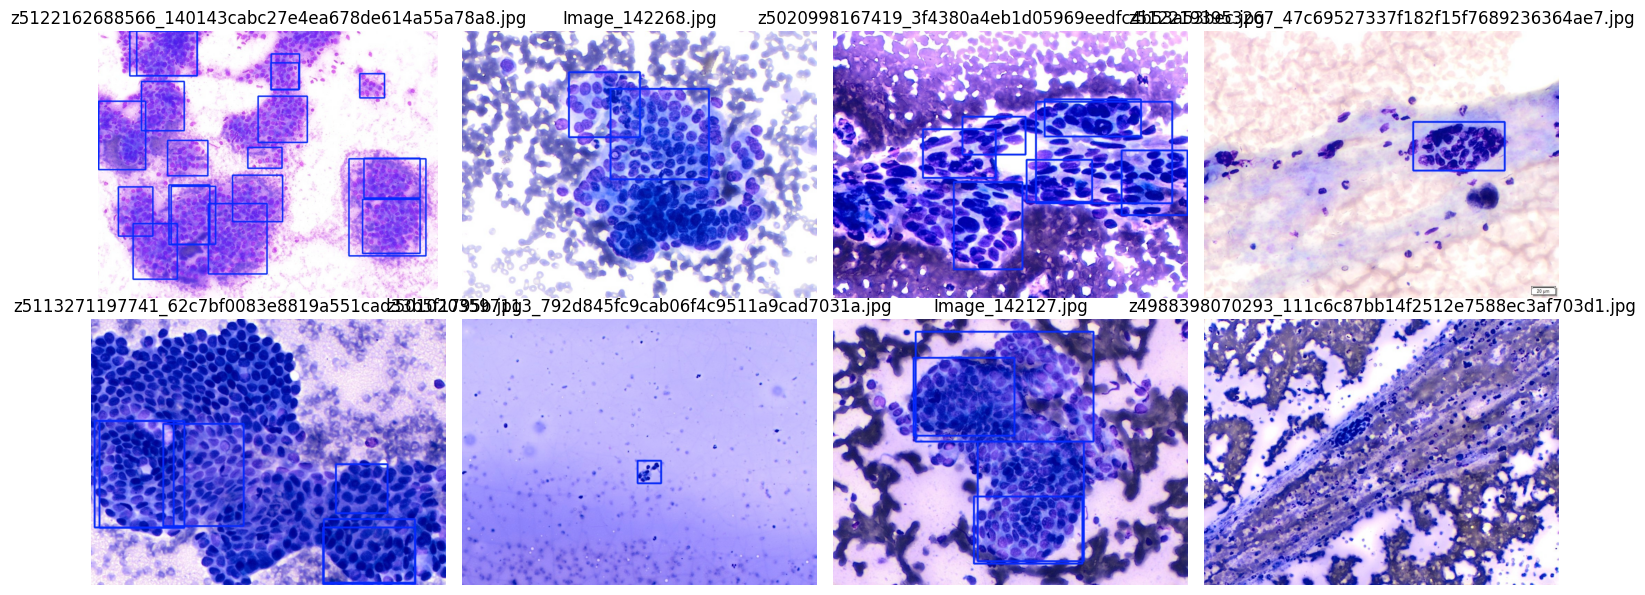

In [3]:
folder_path = '/home/haipn/Research_ThyroidFNA_ClassAI/results/dataver1'
show_apart_of_dataset(folder_path) 
# Bộ dữ liệu đang lưu ở dạng BGR | đây là tại cách save ảnh đầu ra của detect model 
# Nếu định train model dùng dạng BGR thì lúc đọc ảnh predict cũng cần đưa về BGR 
# Sắp tới định gộp chung các data lại (để train với 1 model duy nhất) thì cần chuyển về RGB cho thống nhất 

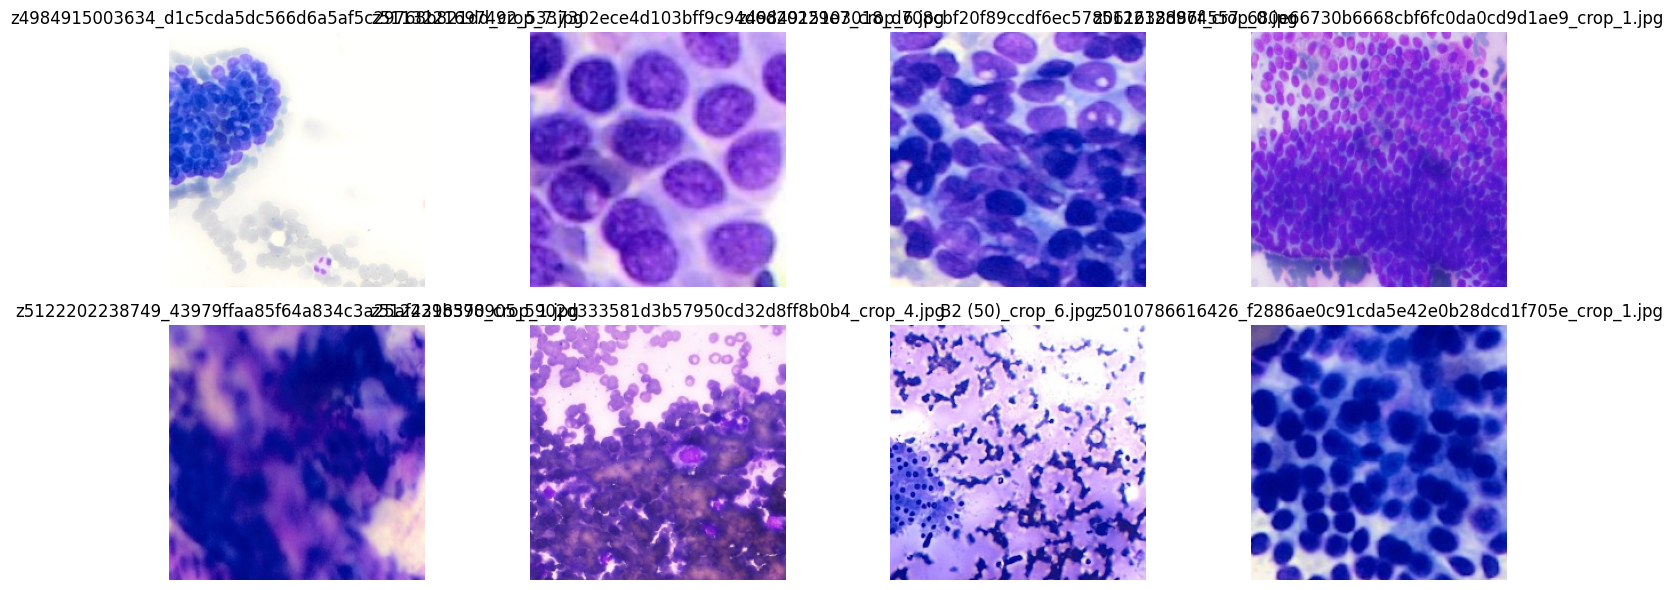

In [4]:
folder_path = '/home/haipn/Research_ThyroidFNA_ClassAI/results/dataver2_image'
show_apart_of_dataset(folder_path)
# Bộ dữ liệu đang lưu ở dạng RGB

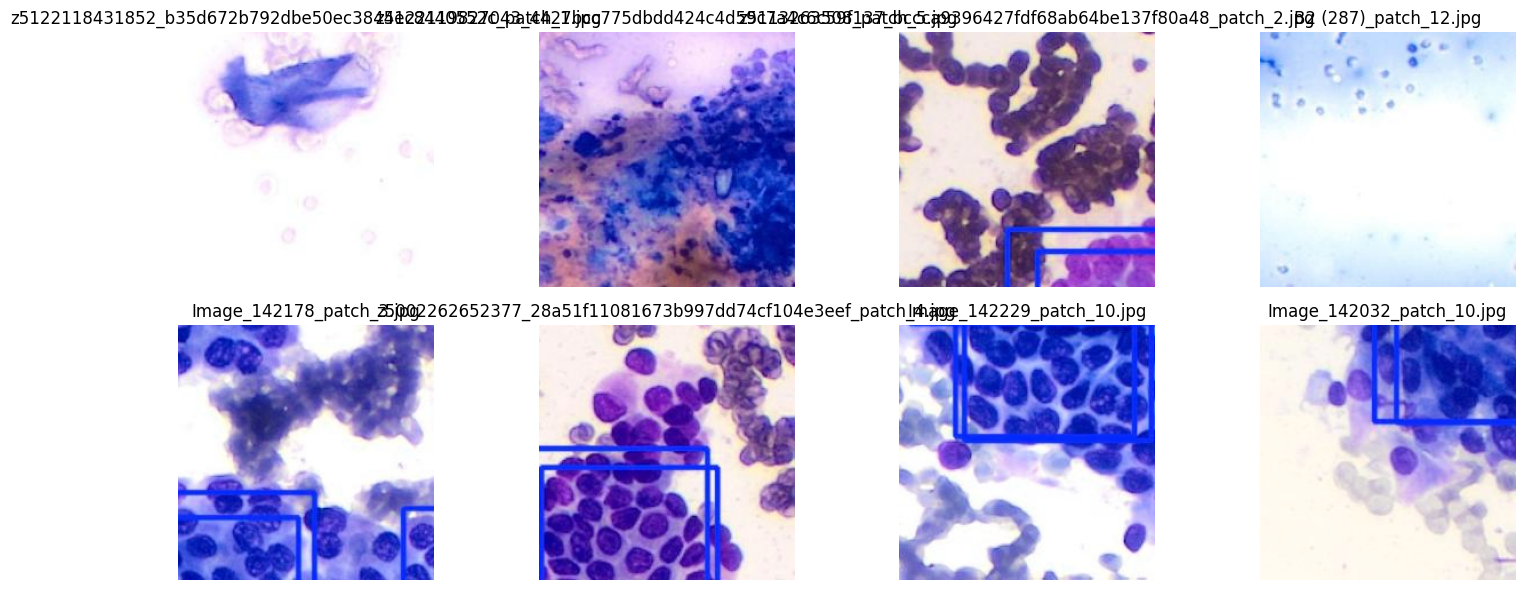

In [5]:
folder_path = '/home/haipn/Research_ThyroidFNA_ClassAI/results/dataver2_patch'
show_apart_of_dataset(folder_path)
# Bộ dữ liệu đang lưu ở dạng BGR | đây là tại cách save ảnh đầu ra của detect model 
# Nếu định train model dùng dạng BGR thì lúc đọc ảnh predict cũng cần đưa về BGR 
# Sắp tới định gộp chung các data lại (để train với 1 model duy nhất) thì cần chuyển về RGB cho thống nhất 